In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
matches = pd.read_csv("E:/BTL/KHDL/matches_after_preprocessing.csv", index_col=0)

In [3]:
train = matches[matches["date"] < '2022-11-01']
test = matches[matches["date"] > '2022-11-01']
predictors = ["venue_code", "opp_code", "hour", "day_code", "gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
X_train = train[predictors]
y_train = train["target"]
X_test = test[predictors]
y_test = test["target"]
X_test.drop(["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"], axis =1)

,venue_code,opp_code,hour,day_code
85,0,6,12,6
86,0,25,19,5
87,1,24,20,0
88,0,4,17,5
89,1,16,19,1
...,...,...,...,...
2593,1,18,15,5
2594,0,24,14,6
2595,1,6,13,6
2596,0,3,19,2


In [4]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds) 
accuracy_score = accuracy_score(y_test, preds)
precision_score = precision_score(y_test, preds)
recall_score = recall_score(y_test, preds)
f1_score = f1_score(y_test, preds)

In [5]:
print("confusion matrix", confusion_matrix)
print("accuracy score: ", accuracy_score)
print("precision score: ", precision_score)
print("recall score: ", recall_score)
print("f1 score: ", f1_score)

confusion matrix [[538   2]
 [  6 355]]
accuracy score:  0.9911209766925638
precision score:  0.9943977591036415
recall score:  0.9833795013850416
f1 score:  0.988857938718663


In [6]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [1, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1,2,5]
}
# Xây dựng mô hình Random Forest
rf = RandomForestClassifier()
#random forest gridsearch 
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [7]:
best_params

{'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'n_estimators': 100}

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
# Đánh giá mô hình
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, preds)
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

print("Confusion matrix:\n", confusion_matrix)
print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)
print("F1 score:", f1)

Confusion matrix:
 [[539   1]
 [  6 355]]
Accuracy score: 0.9922308546059934
Precision score: 0.9971910112359551
Recall score: 0.9833795013850416
F1 score: 0.9902370990237099


In [9]:
skf = StratifiedKFold(n_splits=5, shuffle=True)
# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=skf)
cv_accuracy = round(np.mean(cv_scores) * 100, 1)

print('Cross-Validation Accuracy Score: ', cv_accuracy, '%')


Cross-Validation Accuracy Score:  99.8 %


In [10]:
cv_scores

array([0.99705882, 1.        , 1.        , 0.99705015, 0.99410029])

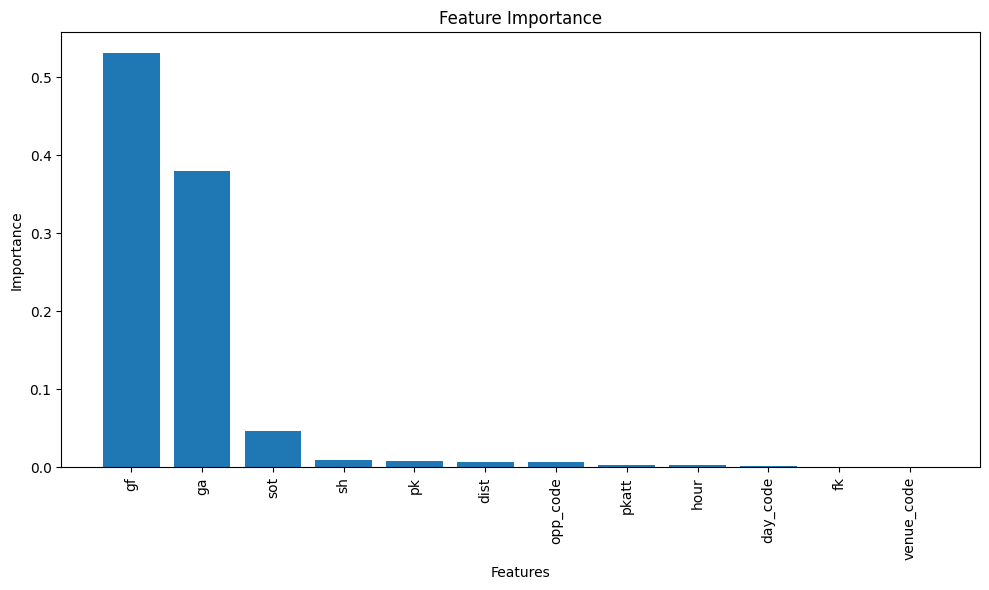

In [11]:
# Trích xuất mức độ quan trọng của các đặc trưng
importance = rf.feature_importances_

# Sắp xếp các đặc trưng theo mức độ quan trọng giảm dần
indices = np.argsort(importance)[::-1]

# Tạo danh sách tên các đặc trưng theo thứ tự quan trọng
feature_names = X_train.columns[indices]

# Vẽ biểu đồ Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()